In [7]:
from tensorflow import keras 

In [31]:
%reload_ext autoreload
%autoreload 2

from earthquake_damage.ml_logic.preprocessor import cus_imputation, preprocess_features, preprocess_targets
from earthquake_damage.ml_logic.model import init_model, train_model, 
cross_validate, predict, predict_submit, ensemble_model,simple_ensemble,nn_clf
from earthquake_damage.data.main import train_test_val
from earthquake_damage.data.merge_dataset import drop_and_merge



In [41]:
import pandas as pd 
import numpy as np 


In [49]:
drop_and_merge()

✅ File saved to /Users/caobai/code/chantalwuer/earthquake_damage/processed_data/comp_data_full.csv


In [50]:
comp_df_full = pd.read_csv('/Users/caobai/code/chantalwuer/earthquake_damage/processed_data/comp_data_full.csv')
comp_df_full.head(3)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,land_surface_condition,foundation_type,roof_type,ground_floor_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,9,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,15,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,20,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,0


In [51]:
cus_imputation(comp_df_full)


Imputation...

✅ X_imputed, with shape (762106, 38)
✅ df_imputed saved to /Users/caobai/code/chantalwuer/earthquake_damage/processed_data/df_imputed.csv


In [23]:
preprocess_features()



Preprocess features...

✅ X_processed, with shape (762106, 66)
✅ X_processed saved to /Users/caobai/code/chantalwuer/earthquake_damage/processed_data/X_processed.csv


In [75]:
preprocess_targets()


Preprocess target...

✅ y processed, with shape (762106,)
✅ y_processed saved to /Users/caobai/code/chantalwuer/earthquake_damage/processed_data/y_processed.csv


In [76]:
X_processed = pd.read_csv('/Users/caobai/code/chantalwuer/earthquake_damage/processed_data/X_processed.csv')
y_processed = pd.read_csv('/Users/caobai/code/chantalwuer/earthquake_damage/processed_data/y_processed.csv')


In [77]:
y_processed.head(3)

,damage_grade
0,2
1,4
2,1


In [78]:
X_processed.head(3)

,pipeline-1__district_id,pipeline-1__vdcmun_id,pipeline-1__ward_id,pipeline-1__count_floors_pre_eq,pipeline-1__age_building,pipeline-1__has_superstructure_adobe_mud,pipeline-1__has_superstructure_mud_mortar_stone,pipeline-1__has_superstructure_stone_flag,pipeline-1__has_superstructure_cement_mortar_stone,pipeline-1__has_superstructure_mud_mortar_brick,...,pipeline-2__plan_configuration_Multi-projected,pipeline-2__plan_configuration_Others,pipeline-2__plan_configuration_Rectangular,pipeline-2__plan_configuration_Square,pipeline-2__plan_configuration_T-shape,pipeline-2__plan_configuration_U-shape,pipeline-2__legal_ownership_status_Institutional,pipeline-2__legal_ownership_status_Other,pipeline-2__legal_ownership_status_Private,pipeline-2__legal_ownership_status_Public
0,-1.5,-1.492556,-1.492494,-1.0,-0.388889,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.5,-1.492556,-1.492494,-1.0,-0.055556,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.5,-1.492556,-1.492494,-1.0,0.222222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
df = X_processed.merge(y_processed, left_index=True, right_index=True)

In [67]:
df.head(3)

,pipeline-1__district_id,pipeline-1__vdcmun_id,pipeline-1__ward_id,pipeline-1__count_floors_pre_eq,pipeline-1__age_building,pipeline-1__has_superstructure_adobe_mud,pipeline-1__has_superstructure_mud_mortar_stone,pipeline-1__has_superstructure_stone_flag,pipeline-1__has_superstructure_cement_mortar_stone,pipeline-1__has_superstructure_mud_mortar_brick,...,pipeline-2__plan_configuration_Others,pipeline-2__plan_configuration_Rectangular,pipeline-2__plan_configuration_Square,pipeline-2__plan_configuration_T-shape,pipeline-2__plan_configuration_U-shape,pipeline-2__legal_ownership_status_Institutional,pipeline-2__legal_ownership_status_Other,pipeline-2__legal_ownership_status_Private,pipeline-2__legal_ownership_status_Public,damage_grade
0,-1.5,-1.492556,-1.492494,-1.0,-0.388889,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1,-1.5,-1.492556,-1.492494,-1.0,-0.055556,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
2,-1.5,-1.492556,-1.492494,-1.0,0.222222,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [18]:
X_train, X_test, X_val, y_train, y_test, y_val = train_test_val()

In [66]:
X_train_1, X_test_1, X_val_1, y_train_1, y_test_1, y_val_1 = train_test_val()

In [67]:
X_train.equals(X_train_1)

True

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

In [42]:

train_model(lr)


/Users/caobai/.pyenv/versions/3.10.6/envs/earthquake_damage/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/caobai/.pyenv/versions/3.10.6/envs/earthquake_damage/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [46]:
y_pred = predict(lr, X_test)

In [45]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

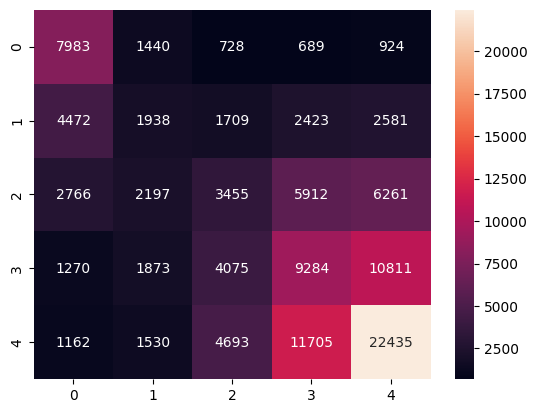

In [48]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.0f');

In [51]:
from sklearn.metrics import f1_score


In [52]:
f1_score(y_test, y_pred, average='micro')

0.3944767136708772

In [53]:
cross_validate(lr)
#Cross-validation scores: 0.43821816986544676

/Users/caobai/.pyenv/versions/3.10.6/envs/earthquake_damage/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/caobai/.pyenv/versions/3.10.6/envs/earthquake_damage/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/caobai/.pyenv/versions/3.10.6/envs/earthquake_damage/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataC

Cross-validation scores: 0.43821816986544676


/Users/caobai/.pyenv/versions/3.10.6/envs/earthquake_damage/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.43957074, 0.43723698, 0.43868972, 0.43742443, 0.43816897])

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
X_train.shape

(533474, 66)

In [60]:
model = nn_clf(dim = 66)
train_model(model)
model.evaluate(X_test, y_test)


3573/3573 [==============================] - 2s 429us/step - loss: nan - accuracy: 0.1029


[nan, 0.10290773212909698]

In [90]:
model = nn_clf(dim=66)

if model == nn_clf(dim=66):
    print('good')
else:
    print('bad')


bad


In [92]:
model = train_model(model) 

AttributeError: module 'tensorflow.keras' has no attribute 'engine'

In [64]:
model.predict(X_test)

3573/3573 [==============================] - 1s 374us/step


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [70]:
y_test.value_counts()

damage_grade
4               41525
3               27313
2               20591
1               13123
0               11764
dtype: int64

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
y_train_hot = OneHotEncoder(handle_unknown='ignore').fit_transform(y_train.values.reshape(-1,1)).toarray()


In [77]:
y_train_hot

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])